In [134]:
# RECOPILACION DE DATOS 

# Lectura de las instancias de CVRPLIB

#A-n32-k5

# PRIMERO DEBEMOS LEER DEL ARCHIVO 

import numpy as np 
import pandas as pd 

# Nombre de la instancia 
fname = 'Augerat/A-n32-k5.vrp'

#DONDE

# A : AUTOR DE LA INSTANCIA 
# N : NÚMERO DE NODOS O CIUDADES A VISITAR
# K : NÚMERO DE VEHICULOS DISPONIBLES

# CREAMOS UNA VARIABLE LINEAS COMO LISTA PARA ALMACENAR LA DATA DE LA INSTANCIA

lineas = []

# ABRIMOS LA INSTANCIA Y RECOPILAMOS LA DATA COMO LISTA

with open (fname , 'rt') as f:
    for f_lineas in f:
        lineas.append(f_lineas)

# OBTENIENDO CAPACIDAD DE LOS VEHICULOS , DIMENSION(CANTIDAD DE NODOS) , CANTIDAD DE VEHICULOS COMO STRING

dimension_str = lineas[3]
capacidad_str = lineas[5]
vehiculos_str = lineas[0]

# CAMBIANDO EL TIPO DE STRING A INTEGER

instancia = lineas[0]

capacidad = int((capacidad_str[10:]))

nodos = int(dimension_str[12:])

vehiculos = int(vehiculos_str[14:])

clientes = nodos - 1

print(instancia)
print("La cantidad de vehiculos son de:" , vehiculos)
print("\n")
print("La capacidad de los vehiculos es de : " ,capacidad)
print("\n")
print ("La cantidad de nodos que tiene la instancia es: " , nodos)
print("\n")


extraer_coordenadas = nodos + 7


# OBTENGO LOS DATOS DE LAS COORDENADAS DE LOS NODOS EN UN ARREGLO 


data_coordenadas = lineas[7 : extraer_coordenadas]


# AHORA HAY QUE OBTENER LAS DEMANDAS DE CADA CIUDAD 

extraer_demandas = extraer_coordenadas + 1

data_demandas = lineas[extraer_demandas : extraer_demandas + nodos ]


# SEPARAR LOS DATOS DE EL ARREGLO DE COORDENADAS 

limpieza_coordenadas = []
limpieza_demandas = []


for x in data_coordenadas:
    limpieza_coordenadas.append(x.split())
    
for y in data_demandas:
    limpieza_demandas.append(y.split())
    


#CREACION DEL DATAFRAME Y ALMACENANDO LA DATA DE LIMPIEZA_COORDENADAS

print("Creacion del DATAFRAME de los nodos con sus demandas respectivas")
print("\n")
df = pd.DataFrame({
        "x" : [int(limpieza_coordenadas[x][1]) for x in range(0,nodos)],
        "y" : [int(limpieza_coordenadas[x][2]) for x in range(0,nodos)],
        "demanda" : [int(limpieza_demandas[x][1]) for x in range(0,nodos)]
})
    

print(df)    
print("\n")
    
    
# Generando los arcos o los caminos que se pueden recorrer 

print("DATAFRAME de los nodos con su distancia euclidiana")
print("\n")
df_distancias = pd.DataFrame({
    
        "nodos" : [(i,j) for i in range(0,nodos) for j in range(0,nodos) if i!=j],
        "distancia" : [np.hypot(int(limpieza_coordenadas[i][1]) - int(limpieza_coordenadas[j][1]) ,  int(limpieza_coordenadas[i][2]) -  int(limpieza_coordenadas[i][2]) ) for i in range(0, nodos) for j in range(0,nodos) if i != j]
      
})

print(df_distancias)
print("\n")















NAME : A-n32-k5

La cantidad de vehiculos son de: 5


La capacidad de los vehiculos es de :  100


La cantidad de nodos que tiene la instancia es:  32


Creacion del DATAFRAME de los nodos con sus demandas respectivas


     x   y  demanda
0   82  76        0
1   96  44       19
2   50   5       21
3   49   8        6
4   13   7       19
5   29  89        7
6   58  30       12
7   84  39       16
8   14  24        6
9    2  39       16
10   3  82        8
11   5  10       14
12  98  52       21
13  84  25       16
14  61  59        3
15   1  65       22
16  88  51       18
17  91   2       19
18  19  32        1
19  93   3       24
20  50  93        8
21  98  14       12
22   5  42        4
23  42   9        8
24  61  62       24
25   9  97       24
26  80  55        2
27  57  69       20
28  23  15       15
29  20  70        2
30  85  60       14
31  98   5        9


DATAFRAME de los nodos con su distancia euclidiana


        nodos  distancia
0      (0, 1)       14.0
1      (0, 2)  

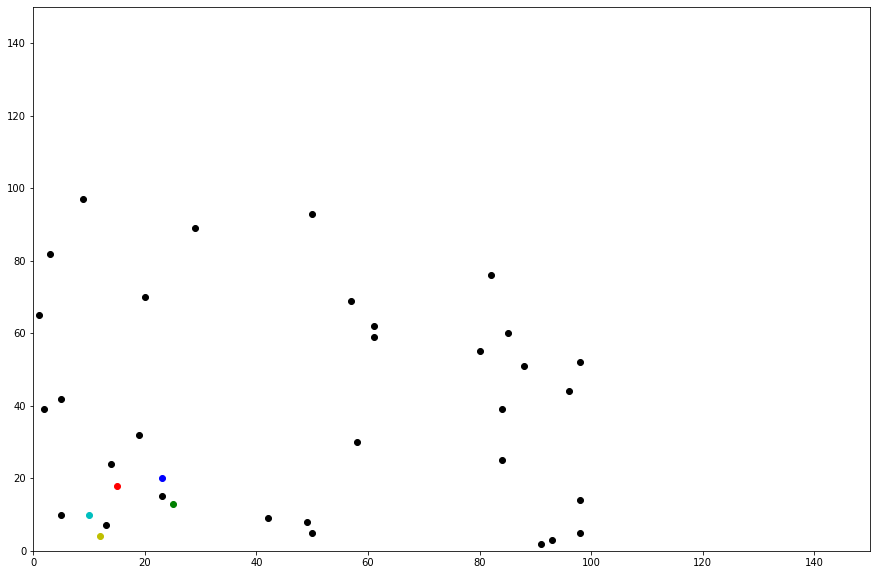

{1: [10, 10], 2: [25, 13], 3: [23, 20], 4: [12, 4], 5: [15, 18]}
0     97.672924
1     92.477024
2     40.311289
3     39.051248
4      4.242641
5     81.252692
6     52.000000
7     79.479557
8     14.560220
9     30.083218
10    72.339477
11     5.000000
12    97.508974
13    75.504967
14    70.724819
15    55.731499
16    88.119237
17    81.394103
18    23.769729
19    83.294658
20    92.135769
21    88.090862
22    32.388269
23    32.015621
24    72.835431
25    87.005747
26    83.216585
27    75.432089
28    13.928388
29    60.827625
30    90.138782
31    88.141931
Name: x, dtype: float64
0     84.958814
1     77.472576
2     26.248809
3     24.515301
4     13.416408
5     76.105190
6     37.121422
7     64.474801
8     15.556349
9     34.713110
10    72.422372
11    20.223748
12    82.764727
13    60.207973
14    58.412327
15    57.271284
16    73.573093
17    66.910388
18    19.924859
19    68.731361
20    83.815273
21    73.006849
22    35.227830
23    17.464249
24    60.802960

In [147]:
# CLUSTERING DE LA DATA 

import matplotlib.pyplot as plt
%matplotlib inline


k = vehiculos

centroide = {
    
    i+1: [np.random.randint(0,nodos) , np.random.randint(0,nodos)]
    for i in range(k)
    
}

fig = plt.figure(figsize=(15,10))
plt.scatter(df['x'] , df['y'] , color='k')
colmap = {1 : 'c' , 2 : 'g' , 3: 'b' , 4 : 'y' , 5 : 'r'}

for i in centroide.keys():
    plt.scatter(*centroide[i] , color=colmap[i])
    
plt.xlim(0,150)
plt.ylim(0,150)
plt.show()



print(centroide)


for i in centroide.keys():
    print (np.hypot(df['x'] - centroide[i][0] , df['y'] - centroide[i][1]))
    
        
        





In [149]:
def asignar_centroide(df , centroide):
    for i in centroide.keys():
        df['distancia_desde_{}'.format(i)] = (
            
           # np.hypot(df['x'] - centroide[i][0] , df['y'] - centroide[i][1])
            np.sqrt( (df['x'] - centroide[i][0])**2 + (df['y'] - centroide[i][1])**2 )
        )
                
    #distancia_centroide = ['distancia_desde_{}'.format[i] for i in centroide.keys()]
    #df['cercania'] = df.loc[: , distancia_centroide].idxmin(axis=1)
    #df['cercania'] = df['cercania'].map(lambda x : int(x.lstrip('distancia_desde_')))
    #df['color'] = df['cercania'].map(lambda x : colmap[x])    
    return df


df = asignar_centroide(df , centroide)
print(df)


        

     x   y  demanda  distancia_desde_1  distancia_desde_2  distancia_desde_3  \
0   82  76        0          97.672924          84.958814          81.344945   
1   96  44       19          92.477024          77.472576          76.843998   
2   50   5       21          40.311289          26.248809          30.886890   
3   49   8        6          39.051248          24.515301          28.635642   
4   13   7       19           4.242641          13.416408          16.401219   
5   29  89        7          81.252692          76.105190          69.260378   
6   58  30       12          52.000000          37.121422          36.400549   
7   84  39       16          79.479557          64.474801          63.890531   
8   14  24        6          14.560220          15.556349           9.848858   
9    2  39       16          30.083218          34.713110          28.319605   
10   3  82        8          72.339477          72.422372          65.145990   
11   5  10       14           5.000000  